In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()
! rm -rf ~/.kaggle/
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
! pip install -q kaggle

In [4]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 1.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=f05504e69a7cdbbef80c3c776b732ccbabb4d409132e7a215c16c1b54694d98b
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [13]:
! kaggle datasets download datamunge/sign-language-mnist

 69% 43.0M/62.6M [00:00<00:00, 41.6MB/s]
100% 62.6M/62.6M [00:00<00:00, 88.9MB/s]


In [20]:
! ls kaggle/input

american_sign_language.PNG  sign_mnist_test	 sign_mnist_train.csv
amer_sign2.png		    sign_mnist_test.csv
amer_sign3.png		    sign_mnist_train


In [18]:
! mkdir kaggle/
! mkdir kaggle/input
! unzip sign-language-mnist.zip -d kaggle/input/

Archive:  sign-language-mnist.zip
  inflating: kaggle/input/amer_sign2.png  
  inflating: kaggle/input/amer_sign3.png  
  inflating: kaggle/input/american_sign_language.PNG  
  inflating: kaggle/input/sign_mnist_test.csv  
  inflating: kaggle/input/sign_mnist_test/sign_mnist_test.csv  
  inflating: kaggle/input/sign_mnist_train.csv  
  inflating: kaggle/input/sign_mnist_train/sign_mnist_train.csv  


In [0]:
! mkdir train
! unzip dogs-vs-cats/train -d train
! mkdir test
! unzip dogs-vs-cats/test1 -d test

Задание 1.
Загрузите данные. Разделите исходный набор данных на обучающую и валидационную выборки.

In [23]:
import csv

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def get_data(filename):
    labels = []
    images = []
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file)
        next(csv_reader)
        for row in csv_reader:
            labels.append(row[0])
            pixels = row[1:785]
            pixels_as_array = np.array_split(pixels, 28)
            images.append(pixels_as_array)
        labels = np.array(labels).astype('float')
        images = np.array(images).astype('float')
    return images, labels


training_images, training_labels = get_data('kaggle/input/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('kaggle/input/sign_mnist_test/sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

kaggle/input/sign_mnist_train.csv
kaggle/input/amer_sign3.png
kaggle/input/sign_mnist_test.csv
kaggle/input/amer_sign2.png
kaggle/input/american_sign_language.PNG
kaggle/input/sign_mnist_train/sign_mnist_train.csv
kaggle/input/sign_mnist_test/sign_mnist_test.csv
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


Задание 2.
Реализуйте глубокую нейронную сеть со сверточными слоями. Какое качество классификации получено? Какая архитектура сети была использована?


In [28]:
training_images, training_labels = get_data('kaggle/input/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('kaggle/input/sign_mnist_test/sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)
train_datagen = ImageDataGenerator(
    rescale=1./255.,
)
validation_datagen = ImageDataGenerator(
    rescale=1./255.
)
    
print(training_images.shape)
print(testing_images.shape)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

len_training_images = len(training_images)
len_testing_images = len(testing_images)

train_flow = train_datagen.flow(training_images, training_labels, batch_size=32)
val_flow = validation_datagen.flow(testing_images, testing_labels, batch_size=32)

history = model.fit_generator(
    train_flow,
    steps_per_epoch=len_training_images/32,
    epochs=15,
    validation_data=val_flow,
    validation_steps=len_testing_images/32
)

model.evaluate(testing_images, testing_labels)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)
(27455, 28, 28, 1)
(7172, 28, 28, 1)
Epoch 1/15
858/857 [==============================] - 4s 5ms/step - loss: 0.5189 - accuracy: 0.8461 - val_loss: 0.3341 - val_accuracy: 0.9007
Epoch 2/15
858/857 [==============================] - 4s 5ms/step - loss: 0.0109 - accuracy: 0.9986 - val_loss: 0.2834 - val_accuracy: 0.9255
Epoch 3/15
858/857 [==============================] - 4s 5ms/step - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.3480 - val_accuracy: 0.9091
Epoch 4/15
858/857 [==============================] - 4s 5ms/step - loss: 4.0983e-04 - accuracy: 1.0000 - val_loss: 0.3243 - val_accuracy: 0.9354
Epoch 5/15
858/857 [==============================] - 4s 5ms/step - loss: 8.6208e-05 - accuracy: 1.0000 - val_loss: 0.3687 - val_accuracy: 0.9357
Epoch 6/15
858/857 [==============================] - 4s 5ms/step - loss: 4.6748e-05 - accuracy: 1.0000 - val_loss: 0.3600 - val_accuracy: 0.9364
Epoch 7/15
858/857 [==============================]

[137.89474487304688, 0.8969603776931763]

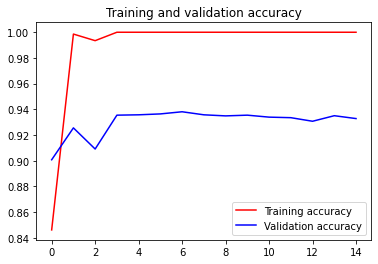

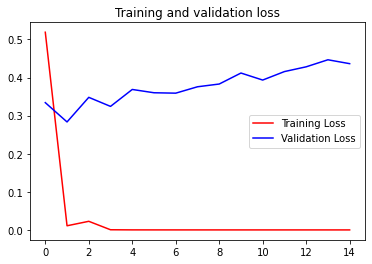

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
training_images, training_labels = get_data('kaggle/input/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('kaggle/input/sign_mnist_test/sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
    rescale=1./255.
)
    
print(training_images.shape)
print(testing_images.shape)


(27455, 28, 28, 1)
(7172, 28, 28, 1)



Задание 3.
Примените дополнение данных (data augmentation). Как это повлияло на качество классификатора? 


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

len_training_images = len(training_images)
len_testing_images = len(testing_images)

train_flow = train_datagen.flow(training_images, training_labels, batch_size=32)
val_flow = validation_datagen.flow(testing_images, testing_labels, batch_size=32)

history = model.fit_generator(
    train_flow,
    steps_per_epoch=len_training_images/32,
    epochs=15,
    validation_data=val_flow,
    validation_steps=len_testing_images/32
)

model.evaluate(testing_images, testing_labels)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
858/857 [==============================] - 15s 18ms/step - loss: 2.5796 - accuracy: 0.2096 - val_loss: 1.3959 - val_accuracy: 0.5244
Epoch 2/15
858/857 [==============================] - 14s 17ms/step - loss: 1.6166 - accuracy: 0.4765 - val_loss: 1.0919 - val_accuracy: 0.6206
Epoch 3/15
858/857 [==============================] - 14s 16ms/step - loss: 1.1934 - accuracy: 0.6077 - val_loss: 0.6936 - val_accuracy: 0.7620
Epoch 4/15
858/857 [==============================] - 14s 16ms/step - loss: 0.9515 - accuracy: 0.6832 - val_loss: 0.4729 - val_accuracy: 0.8345
Epoch 5/15
858/857 [==============================] - 14s 17ms/step - loss: 0.7813 - accuracy: 0.7377 - val_loss: 0.3556 - val_accuracy: 0.8861
Epoch 6/15
858/857 [==============================] - 14s 17ms/step - loss: 0.6781 - accuracy: 0.7743 - val_loss: 0.3433 - val_accuracy: 0.8864
Epoch 7/15
858/857 [==============================] - 14s 17

[121.44520568847656, 0.7582264542579651]

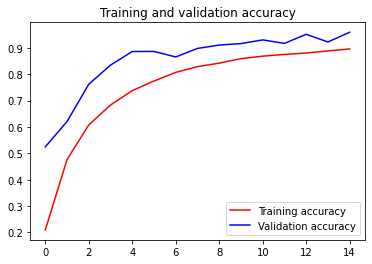

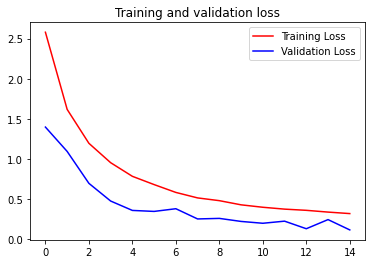

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Задание 4.
Поэкспериментируйте с готовыми нейронными сетями (например, AlexNet, VGG16, Inception и т.п.), применив передаточное обучение. Как это повлияло на качество классификатора? Можно ли было обойтись без него?
Какой максимальный результат удалось получить на контрольной выборке?


In [38]:
from tensorflow.keras.layers import GlobalAveragePooling2D

training_images, training_labels = get_data('kaggle/input/sign_mnist_train/sign_mnist_train.csv')
testing_images, testing_labels = get_data('kaggle/input/sign_mnist_test/sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


def transform(dataset):
  newDataset = list()
  for x in dataset:
    x = np.repeat(x, 3, 2)
    newDataset.append(x)
  return np.array(newDataset)
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

testing_images = transform(testing_images)
training_images = transform(training_images)
print(training_images.shape)
print(testing_images.shape)

from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
    rescale=1./255.
)
    
print(training_images.shape)
print(testing_images.shape)


from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model

base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x)
preds=Dense(25,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds)
model.summary()
for layer in model.layers:
    layer.trainable=False
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

len_training_images = len(training_images)
len_testing_images = len(testing_images)

train_flow = train_datagen.flow(training_images, training_labels, batch_size=32)
val_flow = validation_datagen.flow(testing_images, testing_labels, batch_size=32)

history = model.fit_generator(
    train_flow,
    steps_per_epoch=len_training_images/32,
    epochs=15,
    validation_data=val_flow,
    validation_steps=len_testing_images/32
)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)
(27455, 28, 28, 3)
(7172, 28, 28, 3)
(27455, 28, 28, 3)
(7172, 28, 28, 3)
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
___

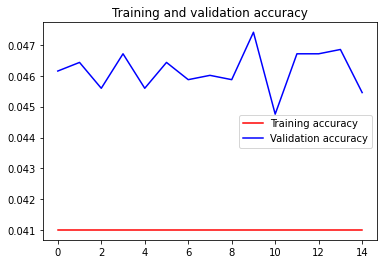

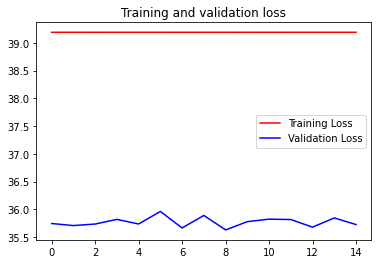

In [37]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()